# ECE 271A HW \#3 The Cheetah Problem (Continued)

In [1]:
import numpy as np
from scipy.io import loadmat
m = loadmat('hw3Data/TrainingSamplesDCT_subsets_8.mat')
p1 = loadmat('hw3Data/Prior_1.mat')
p2 = loadmat('hw3Data/Prior_2.mat')
alpha = loadmat('hw3Data/Alpha.mat')

In [2]:
BG1,BG2,BG3,BG4 = m['D1_BG'],m['D2_BG'],m['D3_BG'],m['D4_BG']
FG1,FG2,FG3,FG4 = m['D1_FG'],m['D2_FG'],m['D3_FG'],m['D4_FG']
w0_1,mu0_FG_1,mu0_BG_1 = p1['W0'],p1['mu0_FG'].T,p1['mu0_BG'].T
w0_2,mu0_FG_2,mu0_FG_2 = p2['W0'],p2['mu0_FG'].T,p2['mu0_BG'].T
a = alpha['alpha']

### a)

We assume the covariance matrix is known, which is $\Sigma=\frac{1}{N}\sum_{i=1}^{N}(X_i-\frac{1}{N}\sum_{i=1}^{N}X_i)(X_i-\frac{1}{N}\sum_{i=1}^{N}X_i)^T$.
<br/>
<br/>In numpy the default coefficient in front of the sample varience is $\frac{1}{N-1}$ so for this problem $\Sigma = \frac{N-1}{N}\Sigma_{numpy}.$

In [3]:
cov_FG1 = np.cov(FG1.T)
cov_BG1 = np.cov(BG1.T)
cov_FG1 = (FG1.shape[0]-1)/FG1.shape[0] * cov_FG1
cov_BG1 = (BG1.shape[0]-1)/BG1.shape[0] * cov_BG1
mu_FG1 = np.mean(FG1,axis = 0)[:,np.newaxis]
mu_BG1 = np.mean(BG1,axis = 0)[:,np.newaxis]

Here we will use strategy 1: $\mu_0$ is given, $\Sigma_{0ii}=\alpha w_i$

In [4]:
temp = a.T.dot(w0_1)
cov0 = np.zeros((9,4096))
cov0[:,[i for i in range(0,4097,65)]] += temp
cov0_1 = cov0.reshape(9,64,64)

Here we want to compute the posterior $P_{\mu|T}(\mu|D_1)$ given that the prior is $P_{\mu}(\mu)=G(\mu,\mu_0,\Sigma_0)$ and $P_{X|\mu,\Sigma}=G(x,\mu,\Sigma)$.
<br/>
<br/>By Bayes Rule $P_{\mu|T}(\mu|D_1)\propto P_{\mu}(\mu)*\prod_{i=1}^{N}{P_{X|\mu}(x_i|\mu)}$. Here we define $C$ as constant,everything not related to $\mu$ will be viewed as constant.
<br/>
<br/>So $\log{P_{\mu|T}(\mu|D_1)} = -\frac{N}{2}\mu^T\Sigma^{-1}\mu-\frac{1}{2}\mu^T\Sigma_0^{-1}\mu+\mu_0^T\Sigma_0^{-1}\mu+\sum_{i=1}{N}{\mu^T\Sigma^{-1}x_i}+C=\frac{1}{2}\mu^T(N\Sigma^{-1}+\Sigma_0^{-1})\mu+\mu^T(\Sigma_0^{-1}\mu_0+\Sigma^{-1}\sum_{i=0}{N}{x_i})+C$.
<br/>
<br/> One of the mathematical properties of Gaussian is that the product of Gaussian PDF is still a Gaussain PDF. So $P_{\mu|T}(\mu|D_1)$ must still be a Gaussian.
<br/>
<br/>So $\log{P_{\mu|T}(\mu|D_1)} = \frac{1}{2}(\mu-A)^T(N\Sigma^{-1}+\Sigma_0^{-1})(\mu-A)$ where $A=(N\Sigma^{-1}+\Sigma_0^{-1})^{-1}(\Sigma_0^{-1}\mu_0+\Sigma^{-1}\sum_{i=1}^{N}{x_i})$
<br/>
<br/>Given that $P_{\mu|T}(\mu|D_1)=G(\mu,\mu_1,\Sigma_1)$,we have:
<br/>
<br/>$\mu_1=A=(N\Sigma^{-1}+\Sigma_0^{-1})^{-1}(\Sigma_0^{-1}\mu_0+\Sigma^{-1}\sum_{i=1}^{N}{x_i})$;$\quad$$\Sigma_1=(N\Sigma^{-1}+\Sigma_0^{-1})^{-1}$.
<br/>
<br/>By further calculation, we can deduce that:
<br/>
<br/>$\mu_1=\Sigma_0(\Sigma_0+\frac{1}{N}\Sigma)^{-1}(\frac{1}{N}\sum_{i=1}^{N}x_i)+\frac{1}{N}\Sigma(\Sigma_0+\frac{1}{N}\Sigma)^{-1}\mu_0;\quad\Sigma_1=\Sigma_0(\Sigma_0+\frac{1}{N}\Sigma)^{-1}\frac{1}{N}\Sigma$

In [5]:
from numpy.linalg import inv
mu1_FG1_1,mu1_BG1_1 = np.zeros(shape = (9,64,1),dtype = 'float'),np.zeros(shape = (9,64,1),dtype = 'float')
cov1_FG1_1,cov1_BG1_1 = np.zeros(shape = (9,64,64),dtype = 'float'),np.zeros(shape = (9,64,64),dtype = 'float')

In [6]:
# from numpy.linalg import inv
# cov1_FG1_1 = inv(FG1.shape[0] * inv(cov_FG1) + inv(cov0_1))
# cov1_BG1_1 = inv(BG1.shape[0] * inv(cov_BG1) + inv(cov0_1))

In [7]:
# temp0 = inv(cov0_1).dot(mu0_FG_1) + inv(cov_FG1).dot(np.sum(FG1,axis = 0)[:,np.newaxis])
# temp1 = inv(cov0_1).dot(mu0_BG_1) + inv(cov_BG1).dot(np.sum(BG1,axis = 0)[:,np.newaxis])
# print(temp0.shape)
# for i in range(cov1_FG1_1.shape[0]):
#     temp0 = inv(cov0_1[i]).dot(mu0_FG_1) + inv(cov_FG1).dot((np.sum(FG1,axis = 0))[:,np.newaxis])
#     temp1 = inv(cov0_1[i]).dot(mu0_BG_1) + inv(cov_BG1).dot((np.sum(BG1,axis = 0))[:,np.newaxis])
#     mu1_FG1_1[i] += cov1_FG1_1[i].dot(temp0)
#     mu1_BG1_1[i] += cov1_BG1_1[i].dot(temp1)

In [8]:
from numpy.linalg import inv,det
for i in range(a.shape[1]):
    cov0_FG1,cov0_BG1 = cov0_1[i],cov0_1[i]
    weight1_FG1 = cov0_FG1.dot(inv(cov0_FG1 + cov_FG1/FG1.shape[0]))
    weight1_BG1 = cov0_BG1.dot(inv(cov0_BG1 + cov_BG1/BG1.shape[0]))
    weight2_FG1 = (cov_FG1/FG1.shape[0]).dot(inv(cov0_FG1 + cov_FG1/FG1.shape[0]))
    weight2_BG1 = (cov_BG1/BG1.shape[0]).dot(inv(cov0_BG1 + cov_BG1/BG1.shape[0]))
    mu1_FG1 = weight1_FG1.dot(mu_FG1) + weight2_FG1.dot(mu0_FG_1)
    mu1_BG1 = weight1_BG1.dot(mu_BG1) + weight2_BG1.dot(mu0_BG_1)
    cov1_FG1 = (cov0_FG1.dot(inv(cov0_FG1 + cov_FG1/FG1.shape[0]))).dot(cov_FG1/FG1.shape[0])
    cov1_BG1 = (cov0_BG1.dot(inv(cov0_BG1 + cov_BG1/BG1.shape[0]))).dot(cov_BG1/BG1.shape[0])
    mu1_FG1_1[i] = mu1_FG1_1[i] + mu1_FG1
    mu1_BG1_1[i] = mu1_BG1_1[i] + mu1_BG1
    cov1_FG1_1[i] = cov1_FG1_1[i] + cov1_FG1
    cov1_BG1_1[i] = cov1_BG1_1[i] + cov1_BG1

Next step is to compute the predictive distribution using the posterior distribution of $\mu$.
<br/>
<br/>$P_{X|T}(x|D_1)=\int_{\mu}P_{X|\mu,\Sigma}(x|\mu,\Sigma)*P_{\mu|T}(\mu|D_1)d\mu=\int_{\mu}G(x,\mu,\Sigma)*G(\mu,\mu_1,\Sigma_1)d\mu=G(x,\mu_1,\Sigma_1+\Sigma)$

In [14]:
mu_pred_FG1,mu_pred_BG1 = mu1_FG1_1,mu1_BG1_1
cov_pred_FG1,cov_pred_BG1 = np.zeros(shape = (9,64,64),dtype = 'float'),np.zeros(shape = (9,64,64),dtype = 'float')
for i in range(9):
    cov_pred_FG1[i] += cov1_FG1_1[i] + cov_FG1
    cov_pred_BG1[i] += cov1_BG1_1[i] + cov_BG1

In [15]:
cov_pred_FG1[0]

array([[ 1.91865326e-01,  2.25871813e-02, -2.94334131e-02, ...,
        -5.74117507e-05, -4.71123990e-05,  1.98392070e-05],
       [ 2.25871813e-02,  4.61079369e-02, -1.85392875e-02, ...,
         4.16624263e-05,  1.76348469e-04, -1.20352839e-04],
       [-2.94334131e-02, -1.85392875e-02,  5.78228699e-02, ...,
         2.99166762e-05,  2.33262482e-05,  1.56208996e-04],
       ...,
       [-5.74117507e-05,  4.16624263e-05,  2.99166762e-05, ...,
         1.49631898e-05,  2.81167541e-06, -3.09268309e-06],
       [-4.71123990e-05,  1.76348469e-04,  2.33262482e-05, ...,
         2.81167541e-06,  1.14531629e-05, -2.12359737e-06],
       [ 1.98392070e-05, -1.20352839e-04,  1.56208996e-04, ...,
        -3.09268309e-06, -2.12359737e-06,  9.93532409e-06]])

Maximum Likelihood for the class priors:
<br/>
<br/>$P_Y(i=1)=\frac{\sum_{t=1}^{N}I(1,Y_t)}{N}\quad P_Y(i=0)=\frac{\sum_{t=1}^{N}I(0,Y_t)}{N}$

In [10]:
prior_cheetah = FG1.shape[0] / (FG1.shape[0] + BG1.shape[0])
prior_grass = BG1.shape[0] / (FG1.shape[0] + BG1.shape[0])
print(prior_cheetah)

0.2


Bayesian BDR: $i^*(x)=argmax_i(P_{X|T}(x|D_1,i)*P_Y(i))$

In [11]:
# define the zigzag transformation
zig_zag = np.array([[0,1,5,6,14,15,27,28],[2,4,7,13,16,26,29,42],[3,8,12,17,25,30,41,43],
                   [9,11,18,24,31,40,44,53],[10,19,23,32,39,45,52,54],[20,22,33,38,46,51,55,60],
                   [21,34,37,47,50,56,59,61],[35,36,48,49,57,58,62,63]])
zz_flat = zig_zag.flatten()
def zig_zag_transform(a):
    result = np.zeros(64)
    for i in range(64):
        result[zz_flat[i]] = a[i]
    return result

In [12]:
# 2D DCT function
import scipy.fftpack
def dct2d(a):
    return scipy.fftpack.dct(scipy.fftpack.dct( a, axis=0, norm='ortho' ),axis=1,norm='ortho')

In [13]:
import imageio
im = imageio.imread('../homework1/cheetah.bmp')
im_array = np.array(im)
print(im_array)

[[121 120 111 ... 142 101   0]
 [120 120 115 ... 137 100   0]
 [122 121 118 ... 131  99   0]
 ...
 [151 158 161 ... 140 105   0]
 [156 165 172 ... 134 103   0]
 [173 179 192 ... 129 101   0]]


In [14]:
im = loadmat('im_double.mat')
im_array = im['img']
print(im_array.shape)

(255, 270)


In [15]:
from numpy.linalg import det
A_list = []
for k in range(cov_pred_FG1.shape[0]):
    A = []
    cov_pred_FG1_inv = inv(cov_pred_FG1[k])
    cov_pred_BG1_inv = inv(cov_pred_BG1[k])
    cov_pred_FG1_det = det(cov_pred_FG1[k])
    cov_pred_BG1_det = det(cov_pred_BG1[k])
    for i in range(0,len(im_array)-8):
        for j in range(0,im_array.shape[1]-8):
            FG,BG = 0,0
            row_start,row_end = i,i+8
            col_start,col_end = j,j+8
            block = im_array[row_start:row_end,col_start:col_end]
            block_dct = dct2d(block).flatten()
            block_dct = zig_zag_transform(block_dct)
            # foreground
            temp1 = block_dct[:,np.newaxis] - mu_pred_FG1[k]
            temp2 = (temp1.T.dot(cov_pred_FG1_inv)).dot(temp1)
            temp3 = np.log((2*np.pi)**64 * cov_pred_FG1_det) - 2 * np.log(prior_cheetah)
            FG = temp2 + temp3
            #background
            temp1 = block_dct[:,np.newaxis] - mu_pred_BG1[k]
            temp2 = (temp1.T.dot(cov_pred_BG1_inv)).dot(temp1)
            temp3 = np.log((2*np.pi)**64 * cov_pred_BG1_det) - 2 * np.log(prior_grass)
            BG = temp2 + temp3
            if FG >= BG:
                A.append(0)
            else:
                A.append(1)
    A_matrix = np.reshape(A,(247,262))
    A_matrix_padding = np.lib.pad(A_matrix,(4,4),'constant',constant_values = 0)
    A_list.append(A_matrix_padding)

In [16]:
A_list = np.array(A_list)

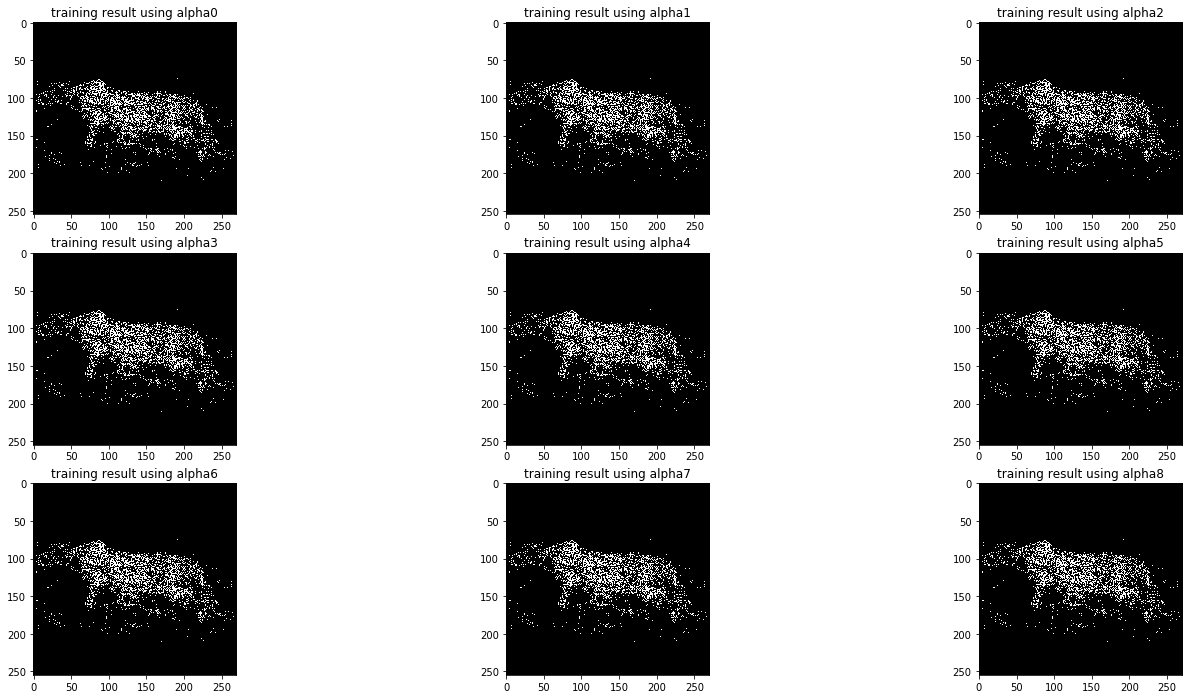

In [18]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(24,12))
for i in range(A_list.shape[0]):
    fig.add_subplot(3,3,i+1)
    plt.imshow(A_list[7],cmap='gray')
    plt.title("training result using alpha%d"%i)
plt.show()

In [19]:
# store the test data as a numpy array
im_test = imageio.imread('../homework1/cheetah_mask.bmp')
im_test_array = np.array(im_test)
# convert 255 to 1 for error calculation
im_test_array = im_test_array / 255
error_list_Bayesian = []
for i in range(A_list.shape[0]):
    e = np.absolute(im_test_array.flatten() - A_list[i].flatten())
    prob_error = np.sum(e) / (255*270)
    error_list_Bayesian.append(prob_error)

In [20]:
error_list_Bayesian = np.array(error_list_Bayesian)

In [21]:
error_list_Bayesian

array([0.14171387, 0.14203341, 0.14271605, 0.14287582, 0.14287582,
       0.14287582, 0.14287582, 0.14287582, 0.14287582])

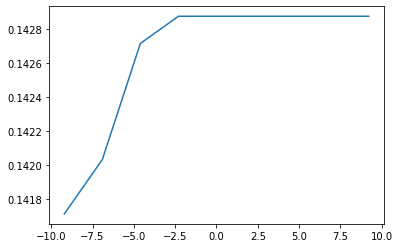

In [22]:
plt.plot(np.log(a.flatten()),error_list_Bayesian)

### b)

In [23]:
mu_FG1_ML = np.mean(FG1,axis = 0)
mu_BG1_ML = np.mean(BG1,axis = 0)
cov_FG1_ML = np.cov(FG1.T)*(FG1.shape[0]-1)/(FG1.shape[0])
cov_BG1_ML = np.cov(BG1.T)*(BG1.shape[0]-1)/(BG1.shape[0])

In [24]:
from numpy.linalg import inv,det
A_ML = []
cov_FG1_inv = inv(cov_FG1_ML)
cov_BG1_inv = inv(cov_BG1_ML)
cov_FG1_det = det(cov_FG1_ML)
cov_BG1_det = det(cov_BG1_ML)
for i in range(0,len(im_array)-8):
    for j in range(0,im_array.shape[1]-8):
        FG,BG = 0,0
        row_start,row_end = i,i+8
        col_start,col_end = j,j+8
        block = im_array[row_start:row_end,col_start:col_end]
        block_dct = dct2d(block).flatten()
        block_dct = zig_zag_transform(block_dct)
        # foreground
        temp = block_dct - mu_FG1_ML
        temp1 = temp[:,np.newaxis]
        temp2 = (temp1.T.dot(cov_FG1_inv)).dot(temp1)
        temp3 = np.log((2*np.pi)**64 * cov_FG1_det) - 2 * np.log(prior_cheetah)
        FG = temp2 + temp3
        #background
        temp = block_dct - mu_BG1_ML
        temp1 = temp[:,np.newaxis]
        temp2 = (temp1.T.dot(cov_BG1_inv)).dot(temp1)
        temp3 = np.log((2*np.pi)**64 * cov_BG1_det) - 2 * np.log(prior_grass)
        BG = temp2 + temp3
        if FG >= BG:
            A_ML.append(0)
        else:
            A_ML.append(1)
A_ML = np.array(A_ML)
print(A_ML.shape)

(64714,)


In [25]:
A_ML_matrix = np.reshape(A_ML,(247,262))
A_ML_matrix_padding = np.lib.pad(A_ML_matrix,(4,4),'constant',constant_values = 0)
print(A_ML_matrix_padding[150])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


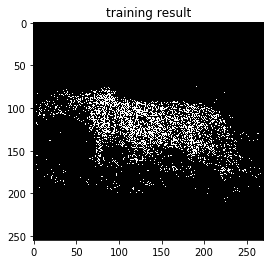

In [26]:
plt.imshow(A_ML_matrix_padding,cmap='gray')
plt.title("training result")
plt.show()

In [27]:
e = np.absolute(im_test_array.flatten() - A_ML_matrix_padding.flatten())
prob_error = np.sum(e) / (255 * 270)
print(prob_error)
error_list_ML = np.ones(9) * prob_error

0.14403776325344952


### c)

In [28]:
cov_FG1_MAP = np.cov(FG1.T)*(FG1.shape[0]-1)/(FG1.shape[0])
cov_BG1_MAP = np.cov(BG1.T)*(BG1.shape[0]-1)/(BG1.shape[0])

In [29]:
from numpy.linalg import det
A_list = []
for k in range(cov_pred_FG1.shape[0]):
    A = []
    cov_pred_FG1_inv = inv(cov_FG1_MAP)
    cov_pred_BG1_inv = inv(cov_BG1_MAP)
    cov_pred_FG1_det = det(cov_FG1_MAP)
    cov_pred_BG1_det = det(cov_BG1_MAP)
    for i in range(0,len(im_array)-8):
        for j in range(0,im_array.shape[1]-8):
            FG,BG = 0,0
            row_start,row_end = i,i+8
            col_start,col_end = j,j+8
            block = im_array[row_start:row_end,col_start:col_end]
            block_dct = dct2d(block).flatten()
            block_dct = zig_zag_transform(block_dct)
            # foreground
            temp1 = block_dct[:,np.newaxis] - mu_pred_FG1[k]
            temp2 = (temp1.T.dot(cov_pred_FG1_inv)).dot(temp1)
            temp3 = np.log((2*np.pi)**64 * cov_pred_FG1_det) - 2 * np.log(prior_cheetah)
            FG = temp2 + temp3
            #background
            temp1 = block_dct[:,np.newaxis] - mu_pred_BG1[k]
            temp2 = (temp1.T.dot(cov_pred_BG1_inv)).dot(temp1)
            temp3 = np.log((2*np.pi)**64 * cov_pred_BG1_det) - 2 * np.log(prior_grass)
            BG = temp2 + temp3
            if FG >= BG:
                A.append(0)
            else:
                A.append(1)
    A_matrix = np.reshape(A,(247,262))
    A_matrix_padding = np.lib.pad(A_matrix,(4,4),'constant',constant_values = 0)
    A_list.append(A_matrix_padding)

In [30]:
A_list = np.array(A_list)

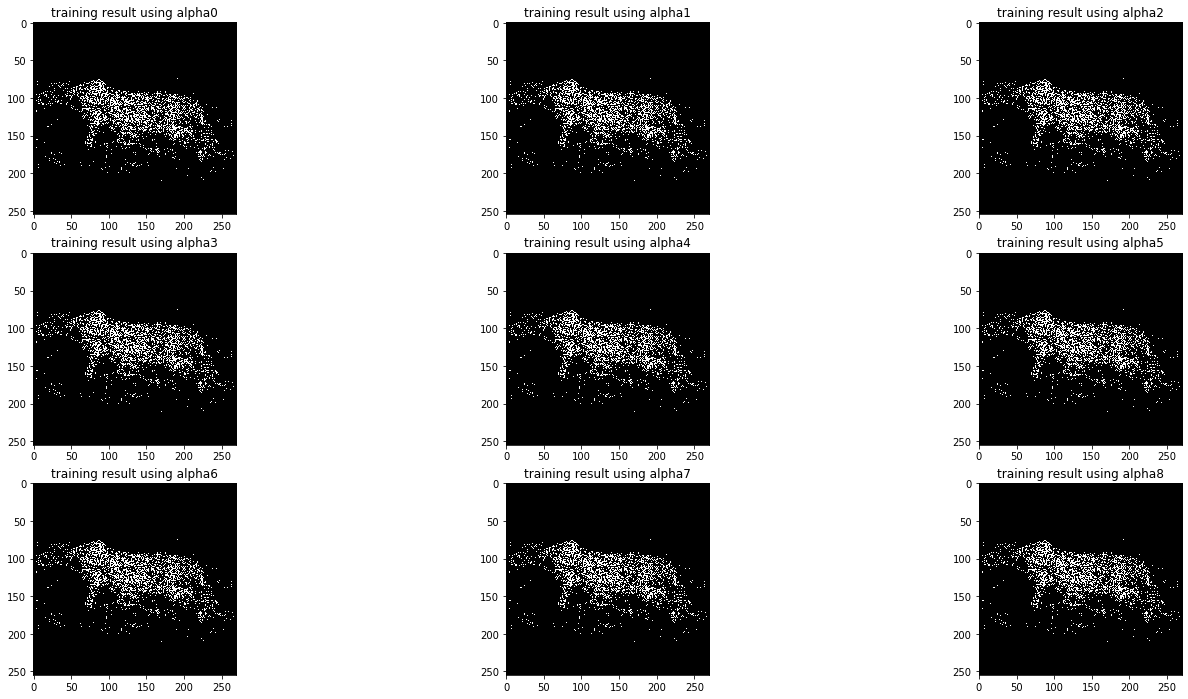

In [31]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(24,12))
for i in range(A_list.shape[0]):
    fig.add_subplot(3,3,i+1)
    plt.imshow(A_list[7],cmap='gray')
    plt.title("training result using alpha%d"%i)
plt.show()

In [32]:
error_list_MAP = []
for i in range(A_list.shape[0]):
    e = np.absolute(im_test_array.flatten() - A_list[i].flatten())
    prob_error = np.sum(e) / (255*270)
    error_list_MAP.append(prob_error)

In [33]:
error_list_MAP = np.array(error_list_MAP)
print(error_list_MAP.shape)

(9,)


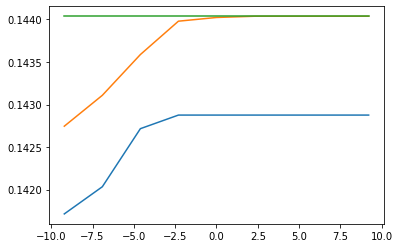

In [34]:
plt.plot(np.log(a.flatten()),error_list_Bayesian,np.log(a.flatten()),error_list_MAP,np.log(a.flatten()),error_list_ML)